In [19]:
import os
import subprocess
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
IMAGES_DIR = './images/input'
RESULTS_DIR = './results'
NUMBER_OF_ITERATIONS = 5

number_of_images = len([name for name in os.listdir(IMAGES_DIR) if os.path.isfile(os.path.join(IMAGES_DIR, name))])

In [21]:
for file in os.listdir('results'):
    if file.endswith('.txt'):
        os.remove(f'results/{file}')

In [22]:
scripts = ['./ffmpeg.sh', './graphicsmagick.sh', './imagemagick.sh', './libvips.sh', './pillow.py', './opencv.py']

for script in scripts:
    for _ in range(NUMBER_OF_ITERATIONS):
        # get the file extension
        _, ext = os.path.splitext(script)
        # run python files with python3
        if ext == '.py':
            subprocess.run(['python3', script])
        # run shell scripts directly
        elif ext == '.sh':
            subprocess.run(['bash', '-c', script])

crop 0011.jpg | Duration: 0.087 seconds, File Size: 44293 bytes
crop 0012.jpg | Duration: 0.09 seconds, File Size: 117298 bytes
crop 0013.jpg | Duration: 0.082 seconds, File Size: 108055 bytes
crop 0014.jpg | Duration: 0.095 seconds, File Size: 108852 bytes
crop 0015.jpg | Duration: 0.08 seconds, File Size: 101473 bytes
crop 0016.jpg | Duration: 0.08 seconds, File Size: 104800 bytes
crop 0017.jpg | Duration: 0.063 seconds, File Size: 49887 bytes
crop 0018.jpg | Duration: 0.083 seconds, File Size: 114041 bytes
crop 0019.jpg | Duration: 0.074 seconds, File Size: 56383 bytes
crop 0020.jpg | Duration: 0.08 seconds, File Size: 85146 bytes
crop 0001.png | Duration: 0.116 seconds, File Size: 688755 bytes
crop 0002.png | Duration: 0.118 seconds, File Size: 426094 bytes
crop 0003.png | Duration: 0.106 seconds, File Size: 676369 bytes
crop 0004.png | Duration: 0.101 seconds, File Size: 267162 bytes
crop 0005.png | Duration: 0.131 seconds, File Size: 713193 bytes
crop 0006.png | Duration: 0.107 s

In [28]:
tool_scores = {}
tool_durations = {}

for file in os.listdir('results'):
    if file.endswith('.txt'):
        df = pd.read_csv(f'results/{file}', header=None, names=['operation', 'time', 'file_size', 'original_file_size'])
        tool_name = file.replace('-results.txt', '')

        tool_scores[tool_name] = {}
        tool_durations[tool_name] = {}

        for operation in df['operation'].unique():
            selected_records = df[df['operation'] == operation]
            # Calculate the score using the adjusted file size, the original file size, and the duration.
            tool_scores[tool_name][operation] = (100 * selected_records['file_size'] / selected_records['original_file_size'] * selected_records['time']).values
            tool_durations[tool_name][operation] = selected_records['time']

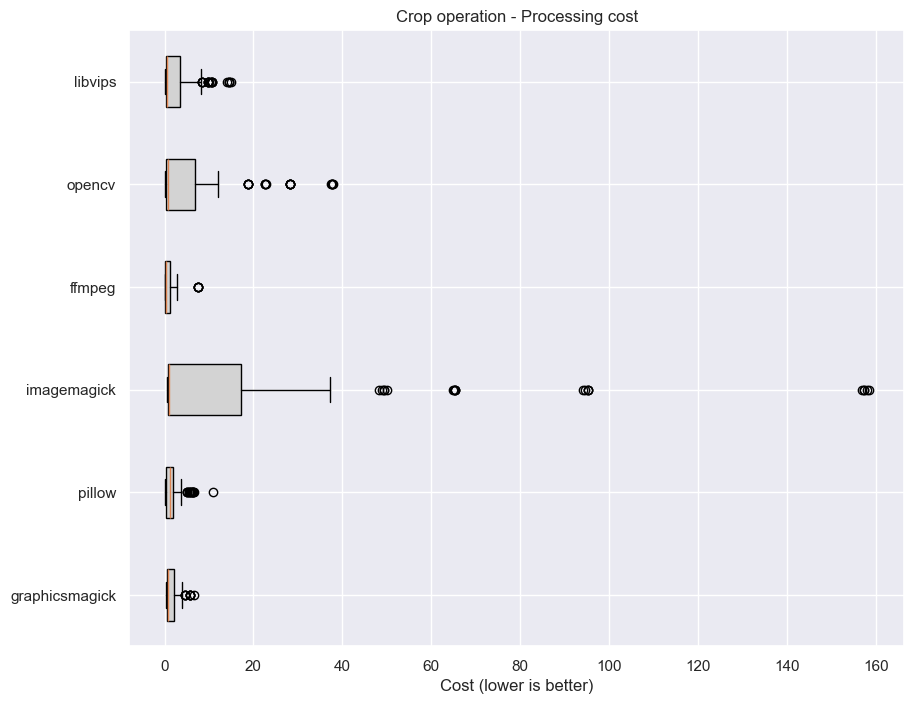

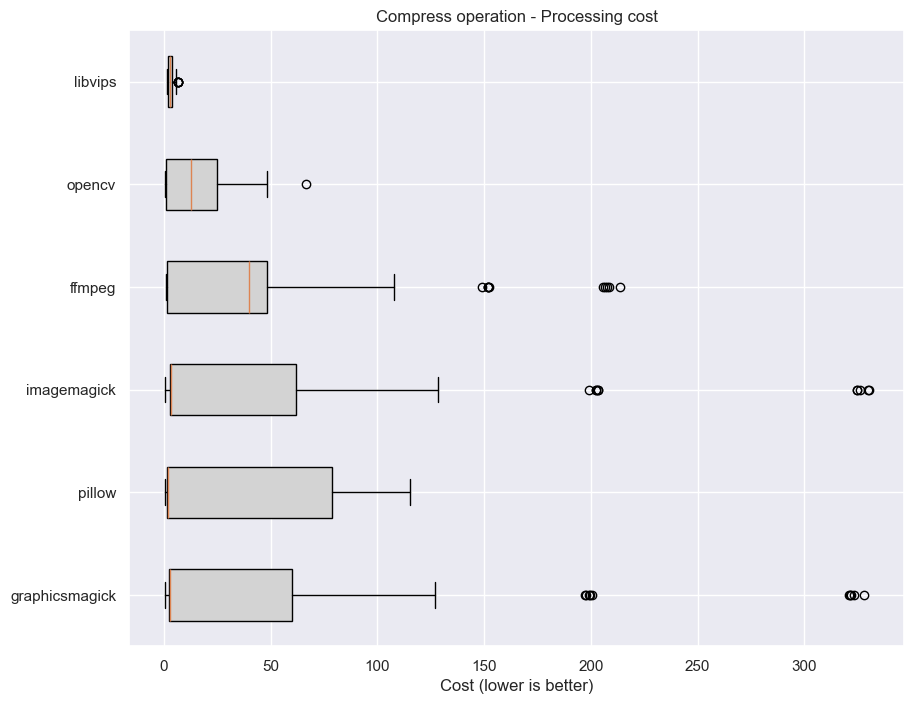

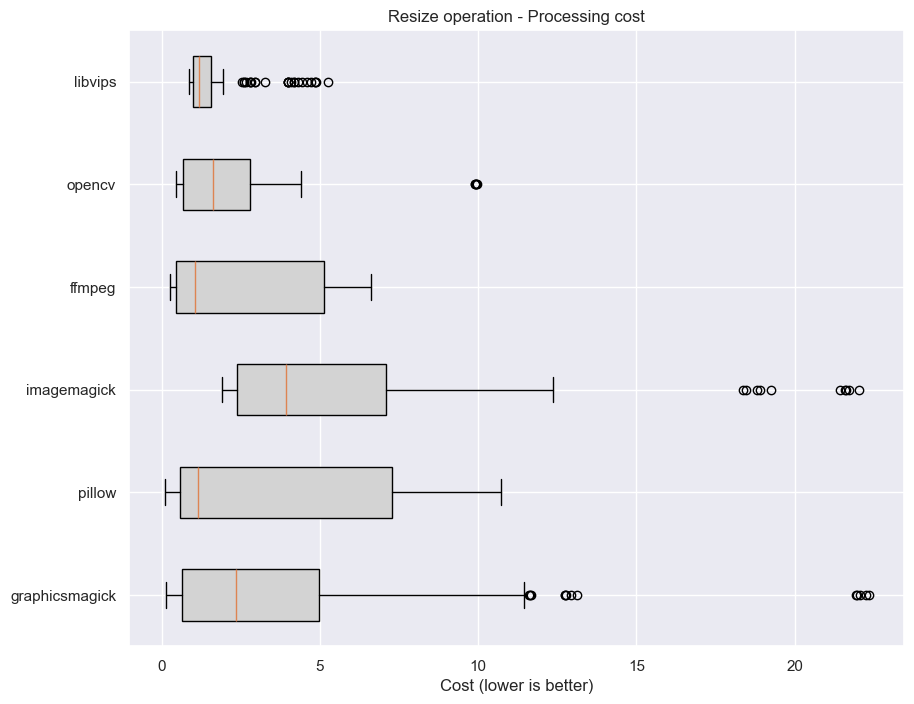

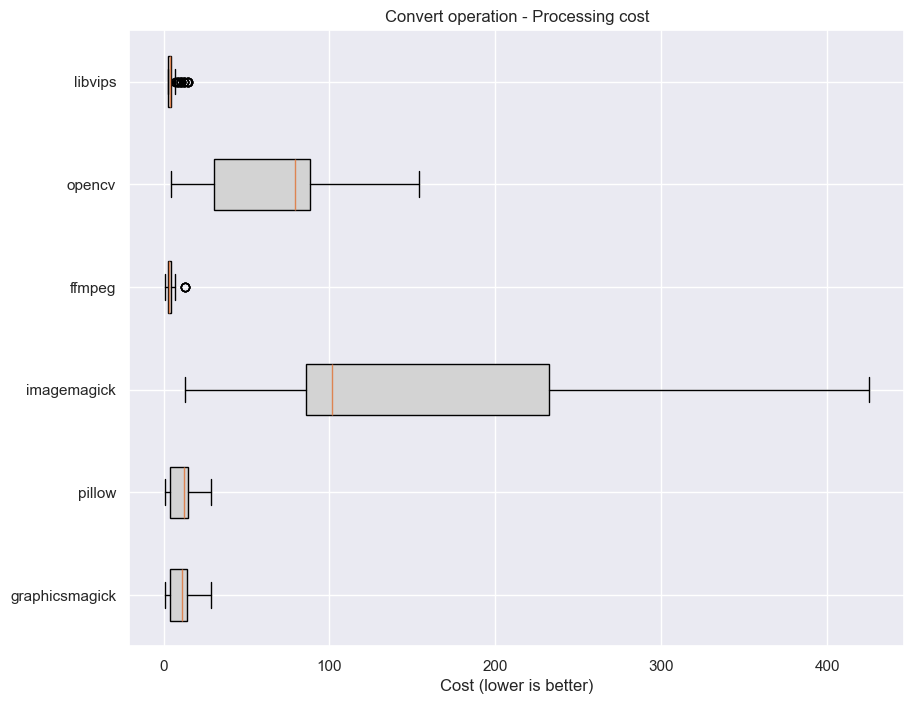

In [45]:
sns.set_theme()
colors = sns.color_palette('mako', len(tool_durations))

operations = ['crop', 'compress', 'resize', 'convert']
for operation in operations:
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 8)

    tool_names = tool_scores.keys()
    data = [tool_scores[tool_name][operation] for tool_name in tool_names]

    ax.boxplot(data, labels=tool_names, patch_artist=True, boxprops=dict(facecolor='lightgray'), vert=False)
    ax.set_xlabel('Cost (lower is better)')
    ax.set_title(f'{operation.capitalize()} operation - Processing cost')

plt.show()


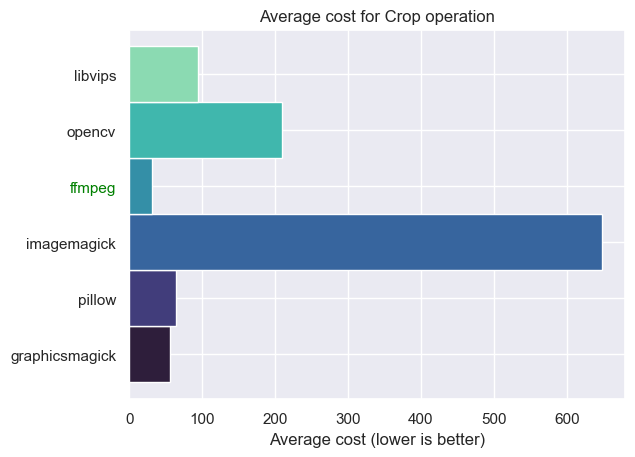

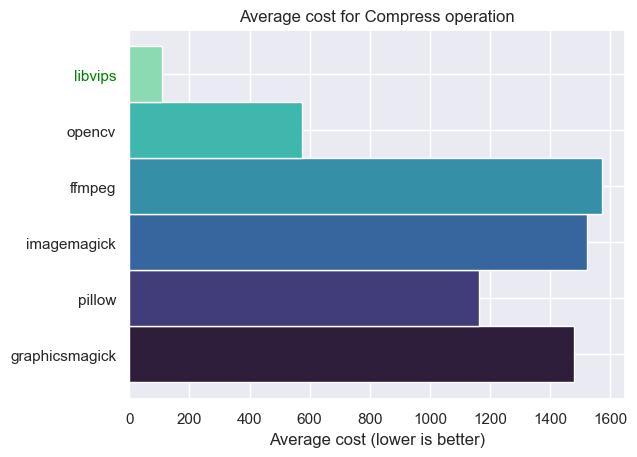

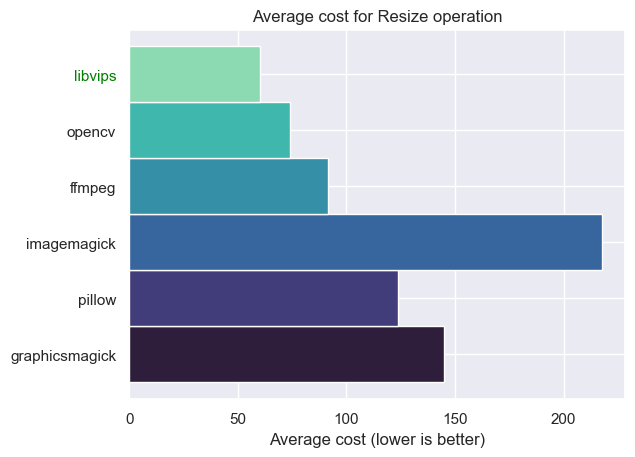

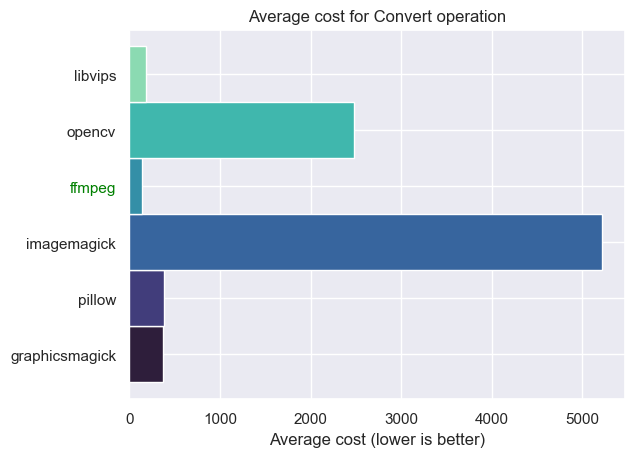

In [46]:
sns.set_theme()
colors = sns.color_palette('mako', len(tool_scores))

operations = ['crop', 'compress', 'resize', 'convert']
for operation in operations:
    fig, ax = plt.subplots()
    bar_width = 1
    tool_names = tool_scores.keys()

    for i, (tool_name, results) in enumerate(tool_scores.items()):
        number_of_images = len(tool_scores[tool_name])
        average_duration_in_ms = sum(results[operation]) / number_of_images
        ax.barh(i, average_duration_in_ms, bar_width, label=tool_name, color=colors[i])
        
    ax.set_xlabel('Average cost (lower is better)')
    ax.set_title(f'Average cost for {operation.capitalize()} operation')
    index = range(len(tool_scores))
    ax.set_yticks(index)
    yticklabels = ax.set_yticklabels(tool_scores.keys())

    average_scores = [(tool, sum(results[operation]) / number_of_images) for tool, results in tool_scores.items()]
    min_time_tool, min_time = min(average_scores, key=lambda item: item[1])

    for label in yticklabels:
        if label.get_text() == min_time_tool:
            label.set_color('green')
    
    plt.show()

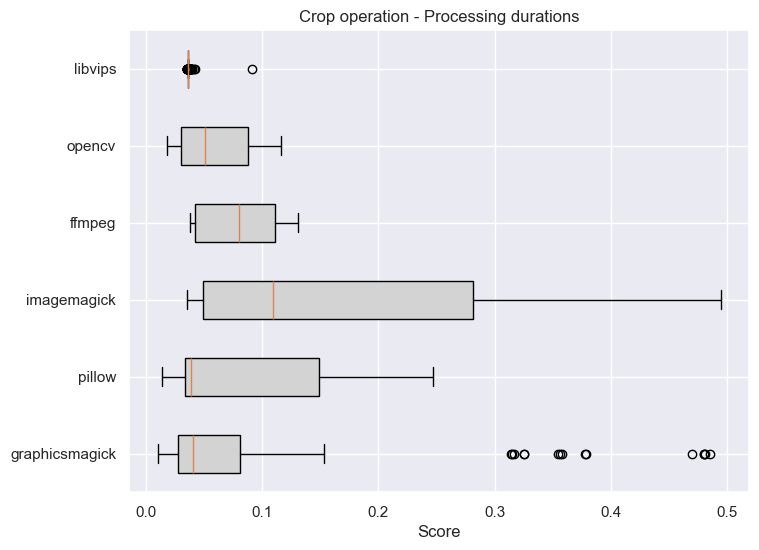

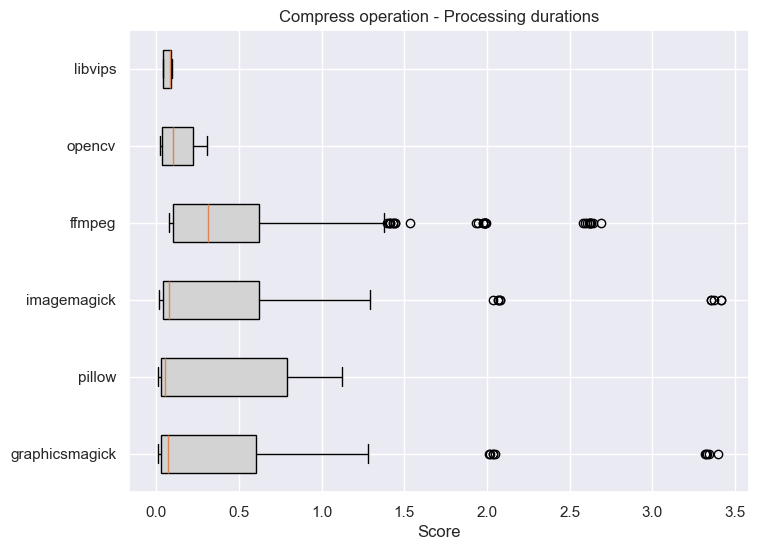

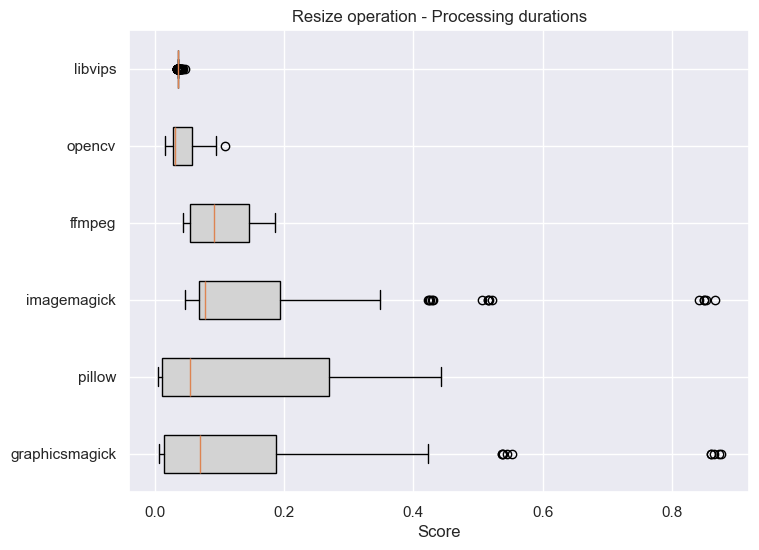

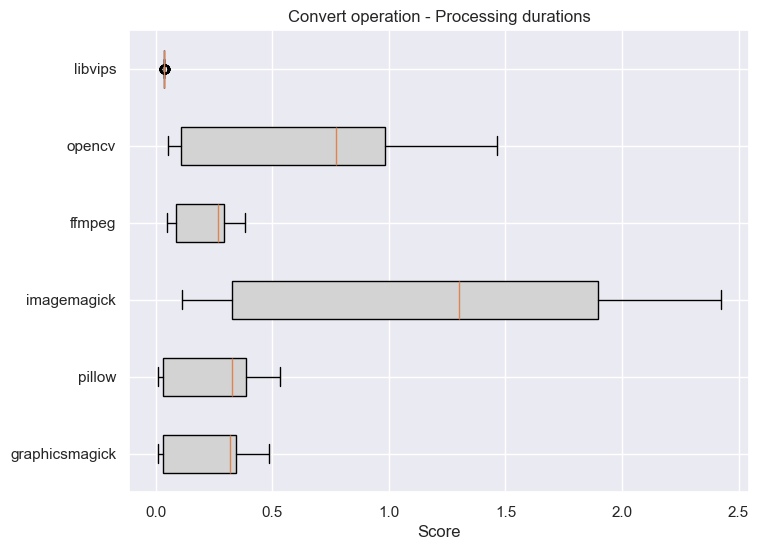

In [42]:
sns.set_theme()
colors = sns.color_palette('mako', len(tool_durations))

operations = ['crop', 'compress', 'resize', 'convert']
for operation in operations:
    fig, ax = plt.subplots()
    fig.set_size_inches(8, 6)

    tool_names = tool_durations.keys()
    data = [tool_durations[tool_name][operation] for tool_name in tool_names]

    ax.boxplot(data, labels=tool_names, patch_artist=True, boxprops=dict(facecolor='lightgray'), vert=False)
    ax.set_xlabel('Score (lower is better)')
    ax.set_title(f'{operation.capitalize()} operation - Processing durations')

    plt.show()

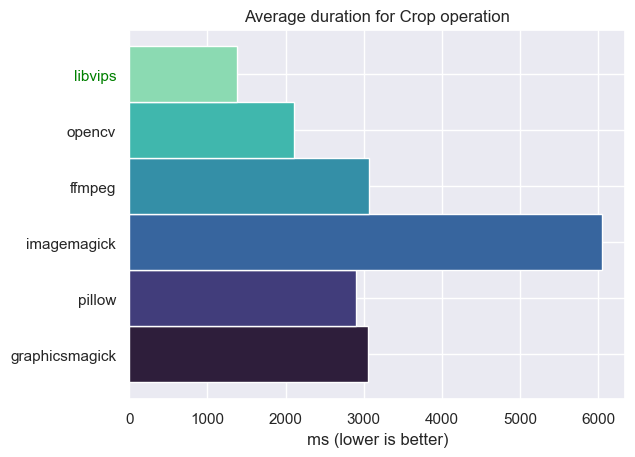

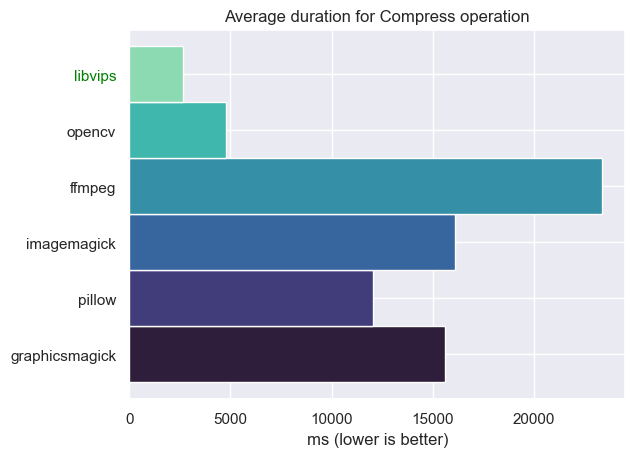

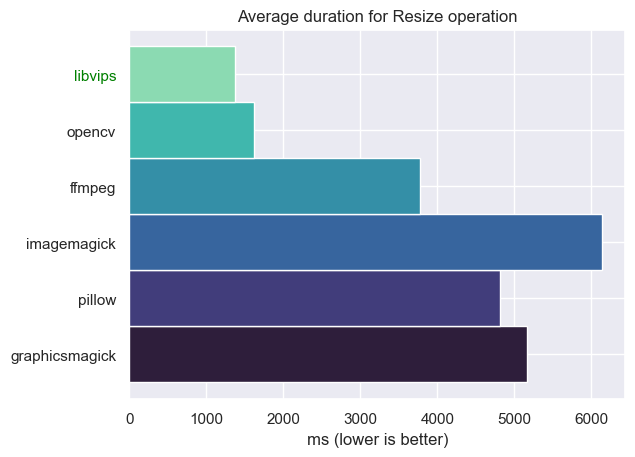

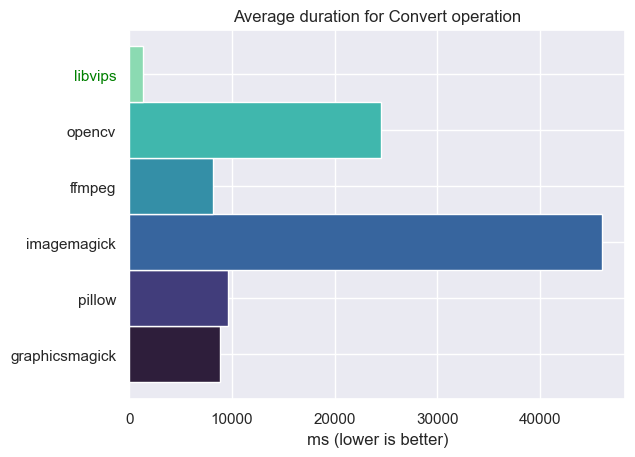

In [32]:
sns.set_theme()
colors = sns.color_palette('mako', len(tool_durations))

operations = ['crop', 'compress', 'resize', 'convert']
for operation in operations:
    fig, ax = plt.subplots()
    bar_width = 1
    tool_names = tool_durations.keys()

    for i, (tool_name, results) in enumerate(tool_durations.items()):
        number_of_images = len(tool_durations[tool_name])
        average_duration_in_ms = 1000 * sum(results[operation]) / number_of_images
        ax.barh(i, average_duration_in_ms, bar_width, label=tool_name, color=colors[i])
        
    ax.set_xlabel('ms (lower is better)')
    ax.set_title(f'Average duration for {operation.capitalize()} operation')
    index = range(len(tool_durations))
    ax.set_yticks(index)
    yticklabels = ax.set_yticklabels(tool_durations.keys())

    average_durations = [(tool, sum(results[operation]) / number_of_images) for tool, results in tool_durations.items()]
    min_time_tool, min_time = min(average_durations, key=lambda item: item[1])

    for label in yticklabels:
        if label.get_text() == min_time_tool:
            label.set_color('green')
    
    plt.show()